In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Notears

In [3]:
filename = "baseline-notears-SF.csv"
data = pd.read_csv(filename, index_col=None)
data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
# data['time'] = np.log10(data['time'])
data['time'] = data['time']/60


count_df = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

data = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)
# data.to_csv("../summary/" + filename, index=False)

In [4]:
filename = "proposal-notears-SF.csv"
proposal = pd.read_csv(filename, index_col=None)

proposal = proposal[proposal['b'] == 4]
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
# proposal['time'] = np.log10(proposal['time'])
proposal['time'] = proposal['time']/60

count_df = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

proposal = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]

proposal.fillna(0, inplace=True)
proposal.to_csv("../summary/" + filename, index=False)

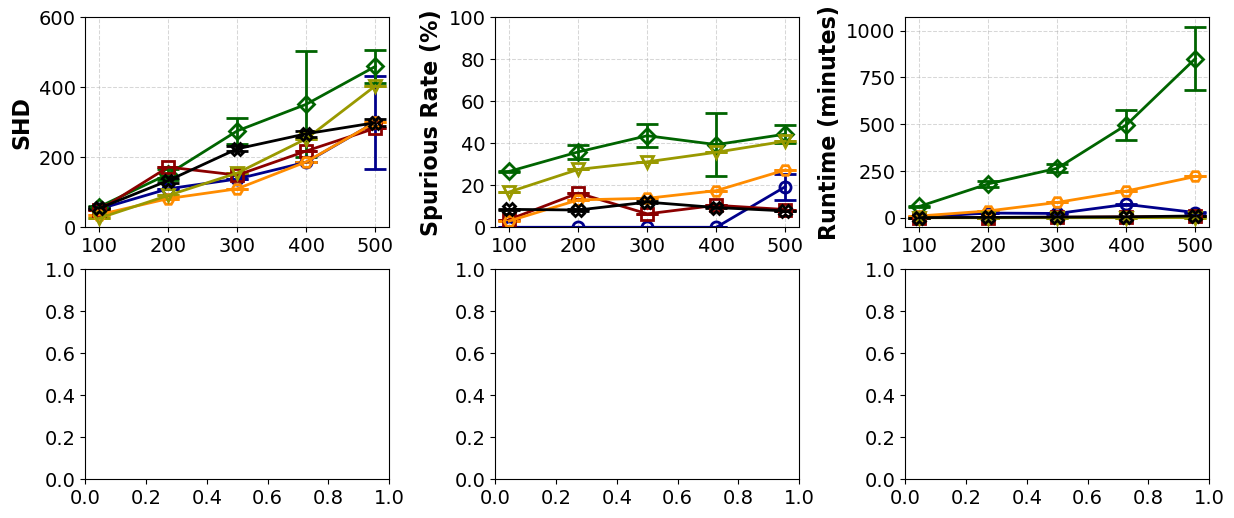

In [5]:
baselines = ["Notears", "MLPNotears", 'DAS', "SCORE", 'GIES', 'FCI'] #  
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange', "#999900", "darkcyan"] # 
ch = ['o', 'D', "s", "H", "v", "P"]
level = [100,200,300,400,500]
# level = [500, 600,700,800,900,1000]

render_dict = {
    'A': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'xlim': None,
        'ylim': [0, 600],
    },
    'C': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'xlim': None,
        'ylim': [0,100],
    },
    'D': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'xlim': None,
        'ylim': None,
    }
}


plt.rcParams.update({"font.size": 14})
layout = ''.join(list(render_dict.keys()))
# fig, axes = plt.subplot_mosaic(layout, figsize=(4.5 * len(layout) + 1, 3))
fig, axes = plt.subplot_mosaic('ACD;EFG', figsize=(4.5 * len(layout) + 1, 6), sharex=False)

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        subdata = data[data['baseline'] == algo]
        if len(subdata):
            axes[loc].errorbar(np.unique(subdata['d']), subdata[f'{metric}'], yerr=subdata[f'{metric}_ci95'], 
                    capsize=8, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                    label=algo, markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].errorbar(np.unique(proposal['d']), proposal[proposal['mode'] =='n'][f'{metric}'], 
                    yerr=proposal[proposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=8, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].set_xlabel(None)
    # axes[loc].set_xlabel("Number of Nodes", fontsize=16)
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16, weight='bold')
    axes[loc].set_xticks(level, level)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.5)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])
    if render_dict[loc]['xlim']:
        axes[loc].set_xlim(*render_dict[loc]['xlim'])
    
plt.subplots_adjust(wspace=0.35)

In [6]:
data = pd.read_csv("baseline-notears-nonlinear-SF.csv", index_col=None)
data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
# data['time'] = np.log10(data['time'])
data['time'] = data['time']/60


count_df = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

data = data.groupby(by=['dataname', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)

proposal = pd.read_csv("proposal-notears-nonlinear-SF.csv", index_col=None)

proposal = proposal[proposal['b'] == 4]
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
# proposal['time'] = np.log10(proposal['time'])
proposal['time'] = proposal['time']/60

count_df = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

proposal = proposal.groupby(by=['dataname', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]

proposal.fillna(0, inplace=True)

In [7]:
render_dict = {
    'E': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'xlim': [100, 510],
        'ylim': [0, 800],
    },
    'F': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'xlim': [100, 510],
        'ylim': [0,100],
    },
    'G': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'xlim': [100, 510],
        'ylim': None,
    }
}

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        subdata = data[data['baseline'] == algo]
        axes[loc].errorbar(np.unique(subdata['d']), subdata[f'{metric}'], yerr=subdata[f'{metric}_ci95'], 
                capsize=8, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].errorbar(np.unique(proposal['d']), proposal[proposal['mode'] =='n'][f'{metric}'], 
                    yerr=proposal[proposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=8, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].set_xlabel("Number of Nodes", fontsize=16, weight='bold')
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16, weight='bold')
    axes[loc].set_xticks(level, level)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.5)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])
    if render_dict[loc]['xlim']:
        axes[loc].set_xlim(*render_dict[loc]['xlim'])

# plt.subplots_adjust(wspace=0.35)

In [8]:
fig.set_size_inches(4.5 * len(layout) + 1.,6)
fig.savefig("../figs/inone/notears-inone-SF.png", format="png", bbox_inches='tight', dpi=500)

In [9]:
fig.set_size_inches(4.5 * len(layout) + 1.,6)
fig.savefig("../figs/inone/notears-inone-SF.svg", format="svg", bbox_inches='tight', dpi=500)

### Synthesize discrete

In [ ]:
data = pd.read_csv("baseline_synthesize.csv", index_col=None)
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
data['time'] = data['time']/60
data['d'] = [int(data['dataname'].iloc[i].split('/')[1].split('_')[0][1:]) for i in range(len(data))]
data['p'] = [data['dataname'].iloc[i].split('/')[1].split('_')[1] for i in range(len(data))]

count_df = data.groupby(by=['p', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = data.groupby(by=['p', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

data = data.groupby(by=['p', 'd', 'baseline'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    data[col + "_ci95"] = std_df[col]
data.fillna(0, inplace=True)
data.to_csv("../summary/baseline_categorical.csv")


proposal = pd.read_csv("proposal-synthesize-rerun.csv", index_col=None)
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
proposal['time'] = proposal['time']/60
proposal['d'] = [int(proposal['dataname'].iloc[i].split('/')[1].split('_')[0][1:]) for i in range(len(proposal))]
proposal['p'] = [proposal['dataname'].iloc[i].split('/')[1].split('_')[1] for i in range(len(proposal))]

count_df = proposal.groupby(by=['p', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].count().reset_index()
std_df = proposal.groupby(by=['p', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

proposal = proposal.groupby(by=['p', 'd', 'mode'])[['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]
proposal.fillna(0, inplace=True)
proposal.to_csv("../summary/proposal_categorical.csv")

In [ ]:
subdata = data[data['p'] == 'intermediate']
subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

subproposal = proposal[proposal['p'] == 'intermediate']
subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

In [ ]:
baselines = ['PC', 'GIES']
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange', "darkcyan", "#8B1E3F"]
ch = ['o', 'D', "s", "H", "*", "P"]
level = [100,200,300,400,500]

render_dict = {
    'A': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'xlim': [100, 510],
        'ylim': None,
    },
    'C': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'xlim': [100, 510],
        'ylim': None,
    },
    'D': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'xlim': [100, 510],
        'ylim': None,
    }
}


plt.rcParams.update({"font.size": 14})
layout = ''.join(list(render_dict.keys()))
# fig, axes = plt.subplot_mosaic(layout, figsize=(4.5 * len(layout) + 1, 3))
fig, axes = plt.subplot_mosaic('ACD;EFG', figsize=(4.5 * len(layout) + 1, 6))
# fig, axes = plt.subplot_mosaic('ACDEFG', figsize=(4.5 * len(layout) + 1, 3))

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        plotdata = subdata[subdata['baseline'] == algo]
        axes[loc].errorbar(np.unique(plotdata['d']), plotdata[f'{metric}'], yerr=plotdata[f'{metric}_ci95'], capsize=4,
                color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=6.5)

    axes[loc].errorbar(np.unique(subproposal['d']), subproposal[subproposal['mode'] =='n'][f'{metric}'], 
                        yerr=subproposal[subproposal['mode'] =='n'][f'{metric}_ci95'], 
                        capsize=4, color="black", marker="X", label="Proposal", linestyle="-",
                        markerfacecolor='none', markersize=6.5)

    axes[loc].set_xlabel(None)
    # axes[loc].set_ylabel(None)
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16)
    axes[loc].set_xticks(level, level, rotation=45)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.4)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])
    if render_dict[loc]['xlim']:
        axes[loc].set_xlim(*render_dict[loc]['xlim'])
    
lgd = axes['C'].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fontsize=15, ncol=3, frameon=True)
# lgd = axes['D'].legend(loc='upper left', bbox_to_anchor=(1.1, 0.7), fontsize=15, ncol=1, frameon=True)
plt.subplots_adjust(wspace=0.45)

In [ ]:
subdata = data[data['p'] == 'hard']
subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

subproposal = proposal[proposal['p'] == 'hard']
subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

In [ ]:
render_dict = {
    'E': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'xlim': [100, 510],
        'ylim': None,
    },
    'F': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'xlim': [100, 510],
        'ylim': None,
    },
    'G': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'xlim': [100, 510],
        'ylim': None,
    }
}

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        plotdata = subdata[subdata['baseline'] == algo]
        axes[loc].errorbar(np.unique(plotdata['d']), plotdata[f'{metric}'], yerr=plotdata[f'{metric}_ci95'], capsize=4,
                color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=6.5)

    axes[loc].errorbar(np.unique(subproposal['d']), subproposal[subproposal['mode'] =='n'][f'{metric}'], 
                        yerr=subproposal[subproposal['mode'] =='n'][f'{metric}_ci95'], 
                        capsize=4, color="black", marker="X", label="Proposal", linestyle="-",
                        markerfacecolor='none', markersize=6.5)

    axes[loc].set_xlabel("Number of Nodes", fontsize=16)
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16)
    axes[loc].set_xticks(level, level)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.4)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])
    if render_dict[loc]['xlim']:
        axes[loc].set_xlim(*render_dict[loc]['xlim'])

plt.subplots_adjust(wspace=0.35)

In [ ]:
fig.set_size_inches(4.5 * len(layout) + 1, 6)
fig.savefig("../figs/categorical.svg", bbox_extra_artists=(lgd,), format="svg", bbox_inches='tight', dpi=500)

### Real-data

In [ ]:
data = pd.read_csv("baseline_generic.csv", index_col=None)

data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['time'] = data['time']
data['espur'] = data['espur']
data['shd'] = data['efals'] + data['espur'] + data['emiss']

count_df = data.groupby(by=['dataname', 'baseline'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = data.groupby(by=['dataname', 'baseline'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, 2:] *= 1.96/np.sqrt(count_df.iloc[:, 2:])

data = data.groupby(by=['dataname', 'baseline'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)
data.to_csv("../summary/baseline_generic.csv", index=False)
# data

In [ ]:
proposal = pd.read_csv("proposal-generic-fin.csv", index_col=None)
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['time'] = proposal['time']
proposal['shd'] = proposal['efals'] + proposal['espur'] + proposal['emiss']
proposal['espur'] = proposal['espur']

count_df = proposal.groupby(by=['dataname', 'mode'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = proposal.groupby(by=['dataname', 'mode'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, 2:] *= 1.96/np.sqrt(count_df.iloc[:, 2:])

proposal = proposal.groupby(by=['dataname', 'mode'])[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]
proposal.fillna(0, inplace=True)
proposal.to_csv("../summary/proposal_generic.csv", index=False)

In [ ]:
proposal[proposal['mode'] == 'n'][['dataname', 'shd', "spuriousness", 'time']]

In [ ]:
data[data['baseline'] == 'GIES'][['dataname', 'shd', "spuriousness", 'time']]

In [ ]:
baselines = ['PC', 'GIES']
names = ["sachs", "insurance", "water", "alarm", "barley", "pathfinder"]# "munin" 

In [ ]:
for col in ['shd', 'F1', 'spuriousness', 'time']:
    data[col + "&"] = data[col].round(2).astype(str) + " & " + data[col + "_ci95"].round(3).astype(str)

In [ ]:
data[['dataname', 'baseline', 'shd&', 'F1&', 'spuriousness&', 'time&']].to_csv("realdata-summary.csv", index=False)

In [ ]:
data[data['baseline'] == 'PC'][['dataname', 'shd&', 'F1&', 'spuriousness&', 'time&']].to_csv("realdata-summary.csv", index=False)

In [ ]:
F1_data = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['F1'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['F1_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    F1_data[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    F1_data['Proposal-' + mode] = (vals, yerrs)

In [ ]:
plot_data2 = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    plot_data2[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    plot_data2['Proposal-' + mode] = (vals, yerrs)

In [ ]:
plot_data3 = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['time'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['time_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    plot_data3[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    plot_data3['Proposal-' + mode] = (vals, yerrs)

In [ ]:
plot_data4 = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['shd'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['shd_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    plot_data4[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['shd'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['shd_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    plot_data4['Proposal-' + mode] = (vals, yerrs)

In [ ]:
plt.rcParams.update({"font.size": 12})

fig, axes = plt.subplot_mosaic("A;B;C;D", figsize=(12, 10))
# fig, ax = plt.subplots(figsize=(8, 3))

N = len(names)
ind = np.arange(N)
width = 0.2

colors = ['#4D5359', '#508484', '#79C99E', '#97DB4F']

# ===============================================================================
i = 0
charts = []
for algo in F1_data.keys():
    vals = F1_data[algo]
    bar = axes['A'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['A'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    charts.append(bar)
    i += 1
  
axes['A'].set_xlabel("") 
axes['A'].set_ylabel('F1', fontsize=16) 
axes['A'].set_ylim(0,1)

axes['A'].set_xticks([]) 
axes['A'].legend(charts, ('PC', 'GIES', 'Proposal-n', 'Proposal-aS'), 
          ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=14) 

# ===============================================================================
i = 0
for algo in plot_data4.keys():
    vals = plot_data4[algo]
    bar = axes['B'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['B'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    i += 1
  
axes['B'].set_xlabel("") 
axes['B'].set_ylabel(rf'SHD', fontsize=16) 
axes['B'].set_ylim(0, 150) 
axes['B'].set_xticks([])

# ===============================================================================
i = 0
for algo in plot_data2.keys():
    vals = plot_data2[algo]
    bar = axes['C'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['C'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    i += 1
  
axes['C'].set_xlabel("") 
axes['C'].set_ylabel(rf'Spurious rate', fontsize=16) 
axes['C'].set_xticks([])
axes['C'].set_ylim(0,1)


# ===============================================================================
i = 0
for algo in plot_data3.keys():
    vals = plot_data3[algo]
    bar = axes['D'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['D'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    i += 1
  
axes['D'].set_xlabel("") 
axes['D'].set_ylabel(rf'Runtime (hours)', fontsize=16) 
axes['D'].set_xticks(ind + width * (i-1)/2, [f"{i[0].upper()}{i[1:]}" for i in names], fontsize=16) 


plt.subplots_adjust(hspace=0.1)

### Extremes

In [42]:
data = pd.read_csv("baseline-notears-extreme-BP.csv", index_col=None)
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['time'] = data['time']/60

groupped = ['dataname', 'baseline', 's']
count_df = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, len(groupped):] *= 1.96/np.sqrt(count_df.iloc[:, len(groupped):])

data = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)
# data.to_csv("../summary/baseline-notears-extreme-BP.csv", index=False)

proposal = pd.read_csv("proposal-notears-extreme-BP.csv", index_col=None)
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['shd'] = proposal['efals'] + proposal['espur'] + proposal['emiss']
proposal['time'] = proposal['time']/60

groupped = ['mode', 's']
count_df = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, len(groupped):] *= 1.96/np.sqrt(count_df.iloc[:, len(groupped):])

proposal = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]

proposal.fillna(0, inplace=True)
# proposal.to_csv("../summary/proposal-notears-extreme-BP.csv", index=False)


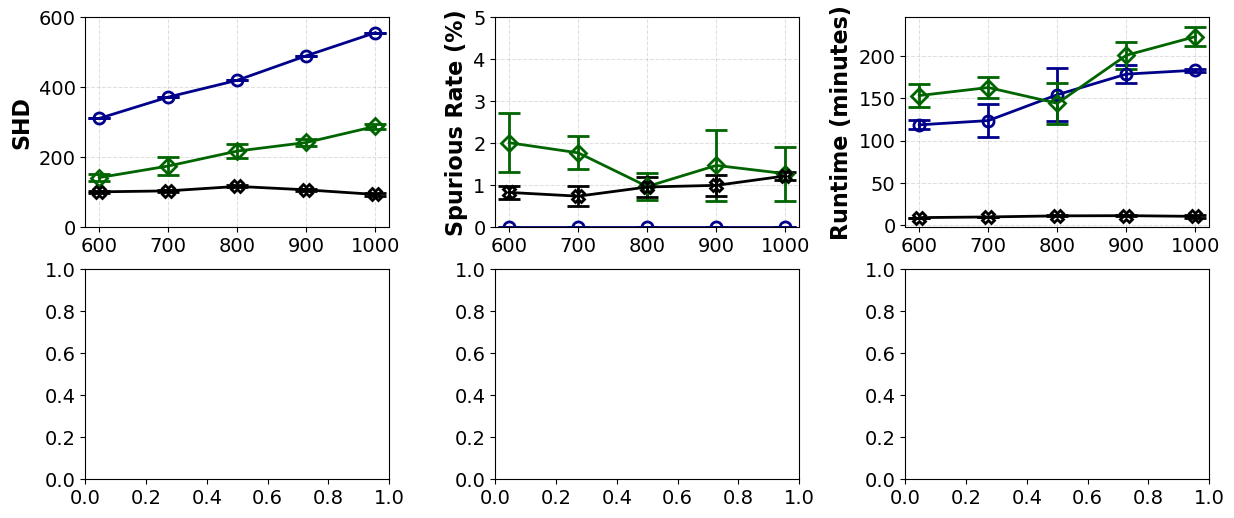

In [44]:
baselines = ["Notears", "MLPNotears", 'DAS', "GIES"] #, "SCORE", "FCI"]
colors = ['darkblue', 'darkgreen', 'darkred', "#8B1E3F"] #, "darkcyan", 'darkorange' 
ch = ['o', 'D', "s", "v"] # "H", "P"
level = [600,700,800,900,1000] #500

render_dict = {
    'A': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'ylim': [0, 600],
    },
    'C': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'ylim': [0,5],
    },
    'D': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'ylim': None,
    }
}


plt.rcParams.update({"font.size": 14})
layout = ''.join(list(render_dict.keys()))
# fig, axes = plt.subplot_mosaic(layout, figsize=(4.5 * len(layout) + 1, 3))
fig, axes = plt.subplot_mosaic('ACD;EFG', figsize=(4.5 * len(layout) + 1, 6), sharex=False)

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        subdata = data[data['baseline'] == algo]
        if len(subdata):
            axes[loc].errorbar(np.unique(subdata['s']), subdata[f'{metric}'], yerr=subdata[f'{metric}_ci95'], 
                    capsize=8, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                    label=algo, markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].errorbar(np.unique(proposal['s']), proposal[proposal['mode'] =='n'][f'{metric}'], 
                    yerr=proposal[proposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=8, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].set_xlabel(None)
    # axes[loc].set_xlabel("Number of Nodes", fontsize=16)
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16, weight='bold')
    axes[loc].set_xticks(level, level)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.4)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])
    
# lgd = axes['C'].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), fontsize=15, ncol=len(baselines)+2, frameon=True)
plt.subplots_adjust(wspace=0.35)

In [45]:
data = pd.read_csv("baseline-notears-nonlinear-extreme-BP.csv", index_col=None)
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals']) * 100
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['time'] = data['time']/60

groupped = ['dataname', 'baseline', 's']
count_df = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, len(groupped):] *= 1.96/np.sqrt(count_df.iloc[:, len(groupped):])

data = data.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)


proposal = pd.read_csv("proposal-notears-nonlinear-extreme-BP.csv", index_col=None)
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals']) * 100
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['shd'] = proposal['efals'] + proposal['espur'] + proposal['emiss']
proposal['time'] = proposal['time']/60

groupped = ['mode', 's']
count_df = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].count().reset_index()
std_df = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].std().reset_index()
std_df.iloc[:, len(groupped):] *= 1.96/np.sqrt(count_df.iloc[:, len(groupped):])

proposal = proposal.groupby(by=groupped)[['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]

proposal.fillna(0, inplace=True)

In [46]:
render_dict = {
    'E': {
        'metric': 'shd',
        'ytitles': 'SHD',
        'ylim': [0, 1000],
    },
    'F': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'ylim': None,
    },
    'G': {
        'metric': 'time',
        'ytitles': 'Runtime (minutes)',
        'ylim': None,
    }
}

for loc in render_dict.keys():
    metric = render_dict[loc]['metric']
    for algo in baselines:
        subdata = data[data['baseline'] == algo]
        if len(subdata):
            axes[loc].errorbar(np.unique(subdata['s']), subdata[f'{metric}'], yerr=subdata[f'{metric}_ci95'], 
                    capsize=8, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                    label=algo, markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].errorbar(np.unique(proposal['s']), proposal[proposal['mode'] =='n'][f'{metric}'], 
                    yerr=proposal[proposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=8, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=8, linewidth=2, markeredgewidth=2)

    axes[loc].set_xlabel("Number of Edges", fontsize=16, weight='bold')
    axes[loc].set_ylabel(render_dict[loc]['ytitles'], fontsize=16, weight='bold')
    axes[loc].set_xticks(level, level)
    axes[loc].grid(visible=True, linestyle='--', linewidth=0.75, alpha=0.4)
    if render_dict[loc]['ylim']:
        axes[loc].set_ylim(*render_dict[loc]['ylim'])

In [48]:
fig.set_size_inches(4.5 * len(layout) + 1.,6)
fig.savefig("../figs/inone/notears-extremes-inone-BP.png", format="png", bbox_inches='tight', dpi=500)

In [49]:
fig.set_size_inches(4.5 * len(layout) + 1.,6)
fig.savefig("../figs/inone/notears-extremes-inone-BP.svg", format="svg", bbox_inches='tight', dpi=500)